# **BUSINESS UNDERSTANDING**

Business Understanding adalah tahap awal di mana dilakukan pemahaman terhadap masalah yang ingin dipecahkan dengan data mining dan definisi tujuan yang ingin dicapai.

Dataset yang saya gunakan kali ini adalah data kesehatan pasien terhadap penyakit stroke (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). Dataset ini digunakan untuk memprediksi apakah pasien kemungkinan terkena stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok.

**Tujuan :** 
Untuk memprediksi pasien apakah mengalami stroke atau tidak dengan menggunakan parameter klinis dan pribadi seorang pasien.


# **DATA UNDERSTANDING**

Data Understanding merupakan tahap pengumpulan data dan analisis terhadap data untuk memahami karakteristik dan kualitas data.

### Import Tools Untuk Memproses Data

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Memasukan Data

In [110]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

### Menampilkan Data

In [111]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


1) **id**: pengidentifikasi unik

2) **gender**: Jenis kelamin pasien "Male", "Female" atau "Other"

3) **age**: usia pasien

4) **hypertension**: 0 jika pasien tidak hipertensi, 1 jika pasien hipertensi

5) **heart_disease**: 0 jika pasien tidak memiliki penyakit jantung, 1 jika pasien memiliki penyakit jantung

6) **ever_married**: Status pernikahan "No" atau "Yes"

7) **work_type**: Pekerjaan "children", "Govt_jov", "Never_worked", "Private" atau "Self-employed"

8) **Residence_type**: Tempat tinggal "Rural" atau "Urban"

9) **avg_glucose_level**: kadar glukosa rata-rata dalam darah

10) **bmi**: *Body Mass Indeks* atau Indeks Massa Tubuh atau yang lebih dikenal dengan Berat Badan Ideal

11) **smoking_status**: Status perokok "formerly smoked", "never smoked", "smokes" atau "Unknown"*

12) **stroke**: 1 jika pasien mengalami stroke atau 0 jika tidak

# **DATA PREPRATION**

Data Preparation adalah tahap persiapan data, termasuk pemilihan data yang relevan, membersihkan data dari data yang tidak diperlukan atau data yang hilang, dan penggabungan data.

## Menghapus Nilai Yang Kosong/Null

### Melihat Tipe Data Setiap Kolom

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [113]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

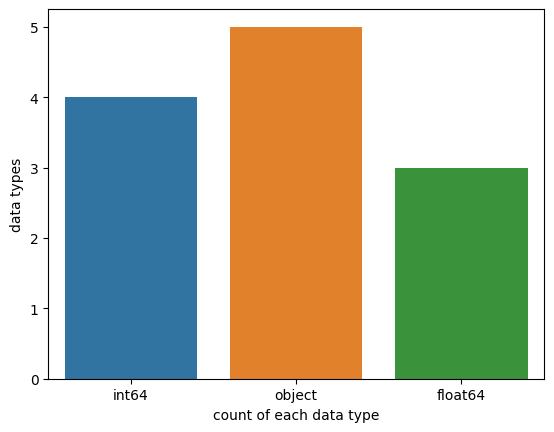

In [114]:
sns.countplot(x=df.dtypes, data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()


### Cek data kosong/null

<Axes: >

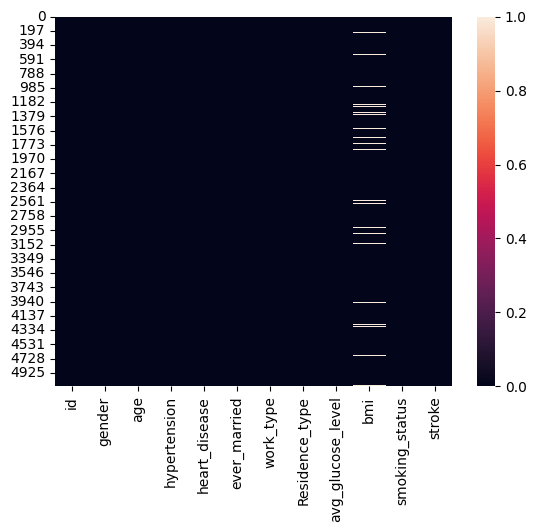

In [115]:
sns.heatmap(df.isnull())

In [116]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Pada kolom "bmi" terdapat 201 data kosong/null. Untuk data yang kosong/null dapat kita isi dengan mean dari kolom tersebut.

### Mengisi data kosong/null dengan mean

In [117]:
mean = df['bmi'].mean()
df['bmi'].fillna(mean, inplace=True)

### Cek data kosong/null

In [118]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Kolom "bmi" yang kosong diisi dengan mean dari kolom tersebut.

## Merubah Nilai Atribut 

Pada Data Understanding di atas dapat kita ketahui terdapat beberapa atribut kategori. Untuk membuat model klasifikasi kita perlu merubah semua atribut kategori menjadi atribut numerik terlebihdahulu.

### Melihat Detail Data

In [119]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [121]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Pada detail diatas dapat kita ketahui terdapat beberapa atribut kategori diantaranya *"gender"*, *"ever-meried"*, *"work_type"*, *"Resident_type"*, dan *"smoking_status"*. Sebelum melanjutkan ketahap selanjutnya atribut-atribut tersebut perlu kita rubah terlebih dahulu menjadi atribut numerik.

### Merubah Isi/Nilai Atribut *"gender"*

#### Melihat Isi/Nilai Atribut *"gender"*

In [122]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Terdapat nilai *"other"* pada atribut *"gender"*, nilai tersebut dapat kita hapus saja karena hanya terdapat 1 data pada dataset. 

#### Mencari Nilai *"Other"* Pada Atribut *"gender"*

In [123]:
df[df["gender"] == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


#### Menghapus Nilai *"other"*

In [124]:
df.drop(df[df['id'] == 56156].index, inplace=True)

#### Melihat Isi/Nilai Atribut *"gender"*

In [125]:
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

#### Mengganti Atribut Kategori Menjadi Atribut Numerik

In [126]:
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

Merubah nilai *"Female"* menjadi 0 dan *"Male"* menjadi 1.

#### Melihat Isi/Nilai Atribut *"gender"*

In [127]:
df["gender"].value_counts()

0    2994
1    2115
Name: gender, dtype: int64

### Merubah Isi/Nilai Atribut *"ever_married"*

#### Melihat Isi/Nilai Atribut *"ever_married"*

In [128]:
df["ever_married"].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

#### Mengganti Atribut Kategori Menjadi Atribut Numerik

In [129]:
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})

Merubah nilai *"No"* menjadi 0 dan *"Yes"* menjadi 1.

#### Melihat Isi/Nilai Atribut *"ever_merried"*

In [130]:
df["ever_married"].value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

### Merubah Isi/Nilai Atribut *"work_type"*

#### Melihat Isi/Nilai Atribut *"work_type"*

In [131]:
df["work_type"].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

#### Mengganti Atribut Kategori Menjadi Atribut Numerik

In [132]:
df['work_type'] = df['work_type'].replace({
    'Private': 0, 
    'Self-employed': 1, 
    'children': 2, 
    'Govt_job': 3,
    'Never_worked': 4
     })

Merubah nilai *"Private"* menjadi 0, *"Self-employed"* menjadi 1, *"children"* menjadi 2, *"Govt_job"* menjadi 3, dan *"Never_worked"* menjadi 4.

#### Melihat Isi/Nilai Atribut *"work_type"*

In [133]:
df["work_type"].value_counts()

0    2924
1     819
2     687
3     657
4      22
Name: work_type, dtype: int64

### Merubah Isi/Nilai Atribut *"Resident_type"*

#### Melihat Isi/Nilai Atribut *"Resident_type"*

In [134]:
df["Residence_type"].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

#### Mengganti Atribut Kategori Menjadi Atribut Numerik

In [135]:
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

Merubah nilai *"Urban"* menjadi 0 dan *"Rural"* menjadi 1.

#### Melihat Isi/Nilai Atribut *"Resident_type"*

In [136]:
df["Residence_type"].value_counts()

0    2596
1    2513
Name: Residence_type, dtype: int64

### Merubah Isi/Nilai Atribut *"smoking_status"*

#### Melihat Isi/Nilai Atribut *"smoking_status"*

In [137]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

#### Mengganti Atribut Kategori Menjadi Atribut Numerik

In [138]:
df['smoking_status'] = df['smoking_status'].replace({
    'never smoked': 0, 
    'Unknown': 1,
    'formerly smoked': 2,
    'smokes': 3
    })

Merubah nilai *"never smoked"* menjadi 0, *"Unknown"* menjadi 1, *"formerly smoked"* menjadi 2, dan *"smoked"* menjadi 3.

#### Melihat Isi/Nilai Atribut *"smoking_status"*

In [139]:
df["smoking_status"].value_counts()

0    1892
1    1544
2     884
3     789
Name: smoking_status, dtype: int64

### Menghapus Atribut Yang Tidak Diperlukan

#### Mnghapus Atribut *"id"*

In [140]:
df.drop("id",axis=1, inplace=True)

### Melihat Detail Data Yang sudah Dirubah

In [141]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.600000,2,1
1,0,61.0,0,0,1,1,1,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,1,105.92,32.500000,0,1
3,0,49.0,0,0,1,0,0,171.23,34.400000,3,1
4,0,79.0,1,0,1,1,1,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,0,83.75,28.893237,0,0
5106,0,81.0,0,0,1,1,0,125.20,40.000000,0,0
5107,0,35.0,0,0,1,1,1,82.99,30.600000,0,0
5108,1,51.0,0,0,1,0,1,166.29,25.600000,2,0


array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'ever_married'}>,
        <Axes: title={'center': 'work_type'}>],
       [<Axes: title={'center': 'Residence_type'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'smoking_status'}>,
        <Axes: title={'center': 'stroke'}>, <Axes: >]], dtype=object)

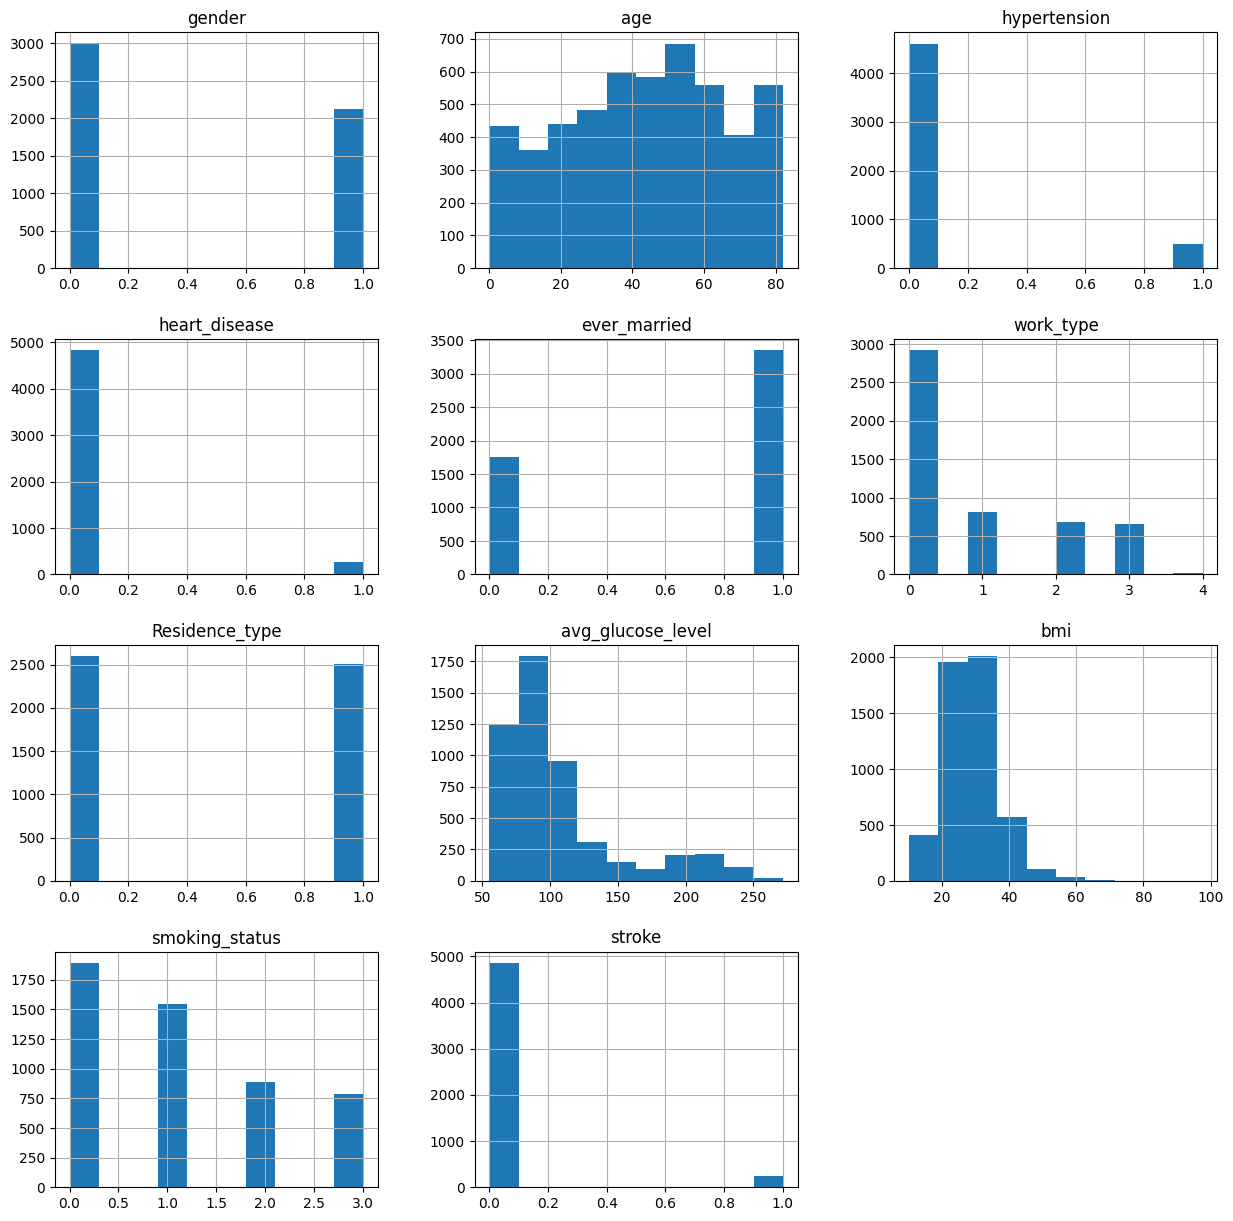

In [142]:
df.hist(figsize = (15,15))

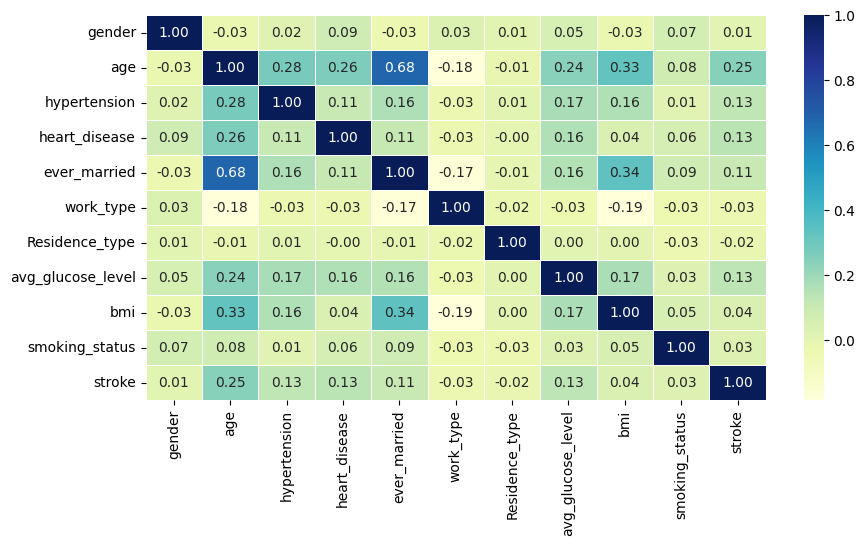

In [143]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                 )


<Axes: >

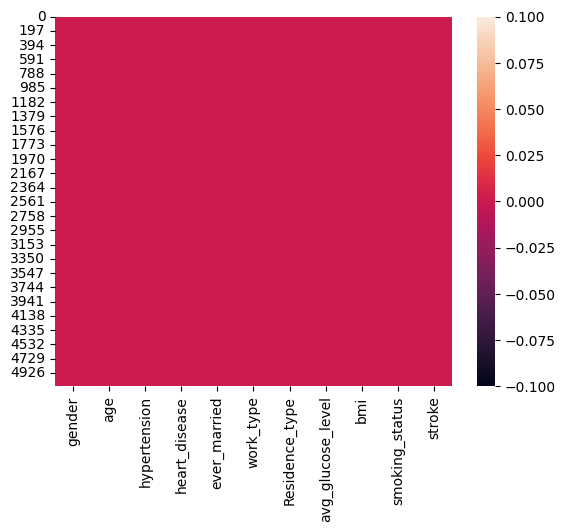

In [144]:
sns.heatmap(df.isnull())


In [145]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

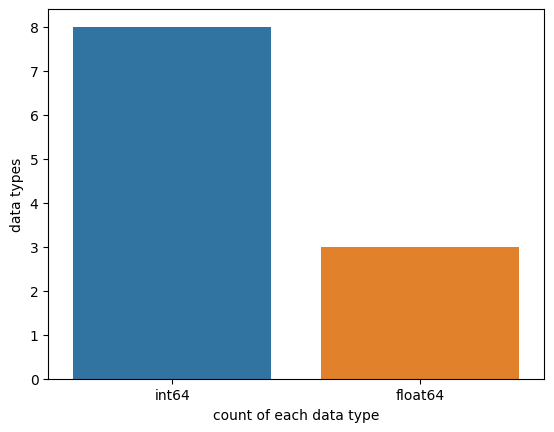

In [165]:
sns.countplot(x=df.dtypes, data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()


In [146]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

Pada detail diatas sudah dapat dipastikan bahwa data sudah siap untuk dibuat modelnya

# **Modelling**

Modeling merupakan tahap membangun model atau algoritma yang sesuai untuk menyelesaikan masalah dan menguji model tersebut.

## Split Data

### Import Tools

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Pisahkan Data Menjadi Nilai X dan y


In [148]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

X.shape, y.shape


((5109, 10), (5109,))

Untuk menyeleksi fitur apa saja yang akan digunakan.

X atau features --> semua kolom kecuali kolom "*stroke*"

y atau lebel/target --> kolom *"stroke"*


setelah dijalankan kita dapat melihat bahwa x yang di dapat sebanyak 5109 baris dan 10 kolom dan y sebanyak 5109 baris dan 1 kolom.

### Training dan Testing Data

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

len(df), len(X_train), len(X_test)

(5109, 4087, 1022)

Kita membagi seluruh kumpulan data menjadi 80% untuk pelatihan dan 20% untuk pengujian. Kita dapat melihat bahwa jumlah data yang ditrining sebanyak 4087 data dan data yang ditesting sebanyak 1022 data dari keselururah data sebanyak 5109 data.

### Melihat Feature Yang Akan Digunkan sebagai Inputan Prediksi

In [150]:
print(X)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          0   
1          0  61.0             0              0             1          1   
2          1  80.0             0              1             1          0   
3          0  49.0             0              0             1          0   
4          0  79.0             1              0             1          1   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          0   
5106       0  81.0             0              0             1          1   
5107       0  35.0             0              0             1          1   
5108       1  51.0             0              0             1          0   
5109       0  44.0             0              0             1          3   

      Residence_type  avg_glucose_level        bmi  smoking_status  
0                 

## Membuat Model

Disini saya akan menggunakan beberapa algoritma untuk membuat model. Algoritma yang digunakan diantaranya Regresi, Naive Bayes K-Nearest Neighbors dan Decision Tree yang nantinya akan dibandingkan nilai akurasi dari masing-masing algoritma. Algoritma dengan nilai akurasi tertinggi nantinya akan dibuat sebagai model prediksi.

### Algoritma Regresi

In [151]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

In [152]:
model_lr = lr.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print('Akurasi data training : ', lr_acc)


Akurasi data training :  0.9481409001956947


### Algoritma Naive Bayes

In [153]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [154]:
model_nb = nb.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb.predict(X_test))
print('Akurasi data training : ', nb_acc)


Akurasi data training :  0.8786692759295499


### Algoritma K-Nearest Neighbors

In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

In [156]:
model_knn = knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print('Akurasi data training : ', knn_acc)

Akurasi data training :  0.9471624266144814


### Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()


In [158]:
model_dtc = dtc.fit(X_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print('Akurasi data training : ', dtc_acc)


Akurasi data training :  0.9060665362035225


In [159]:
from sklearn import tree

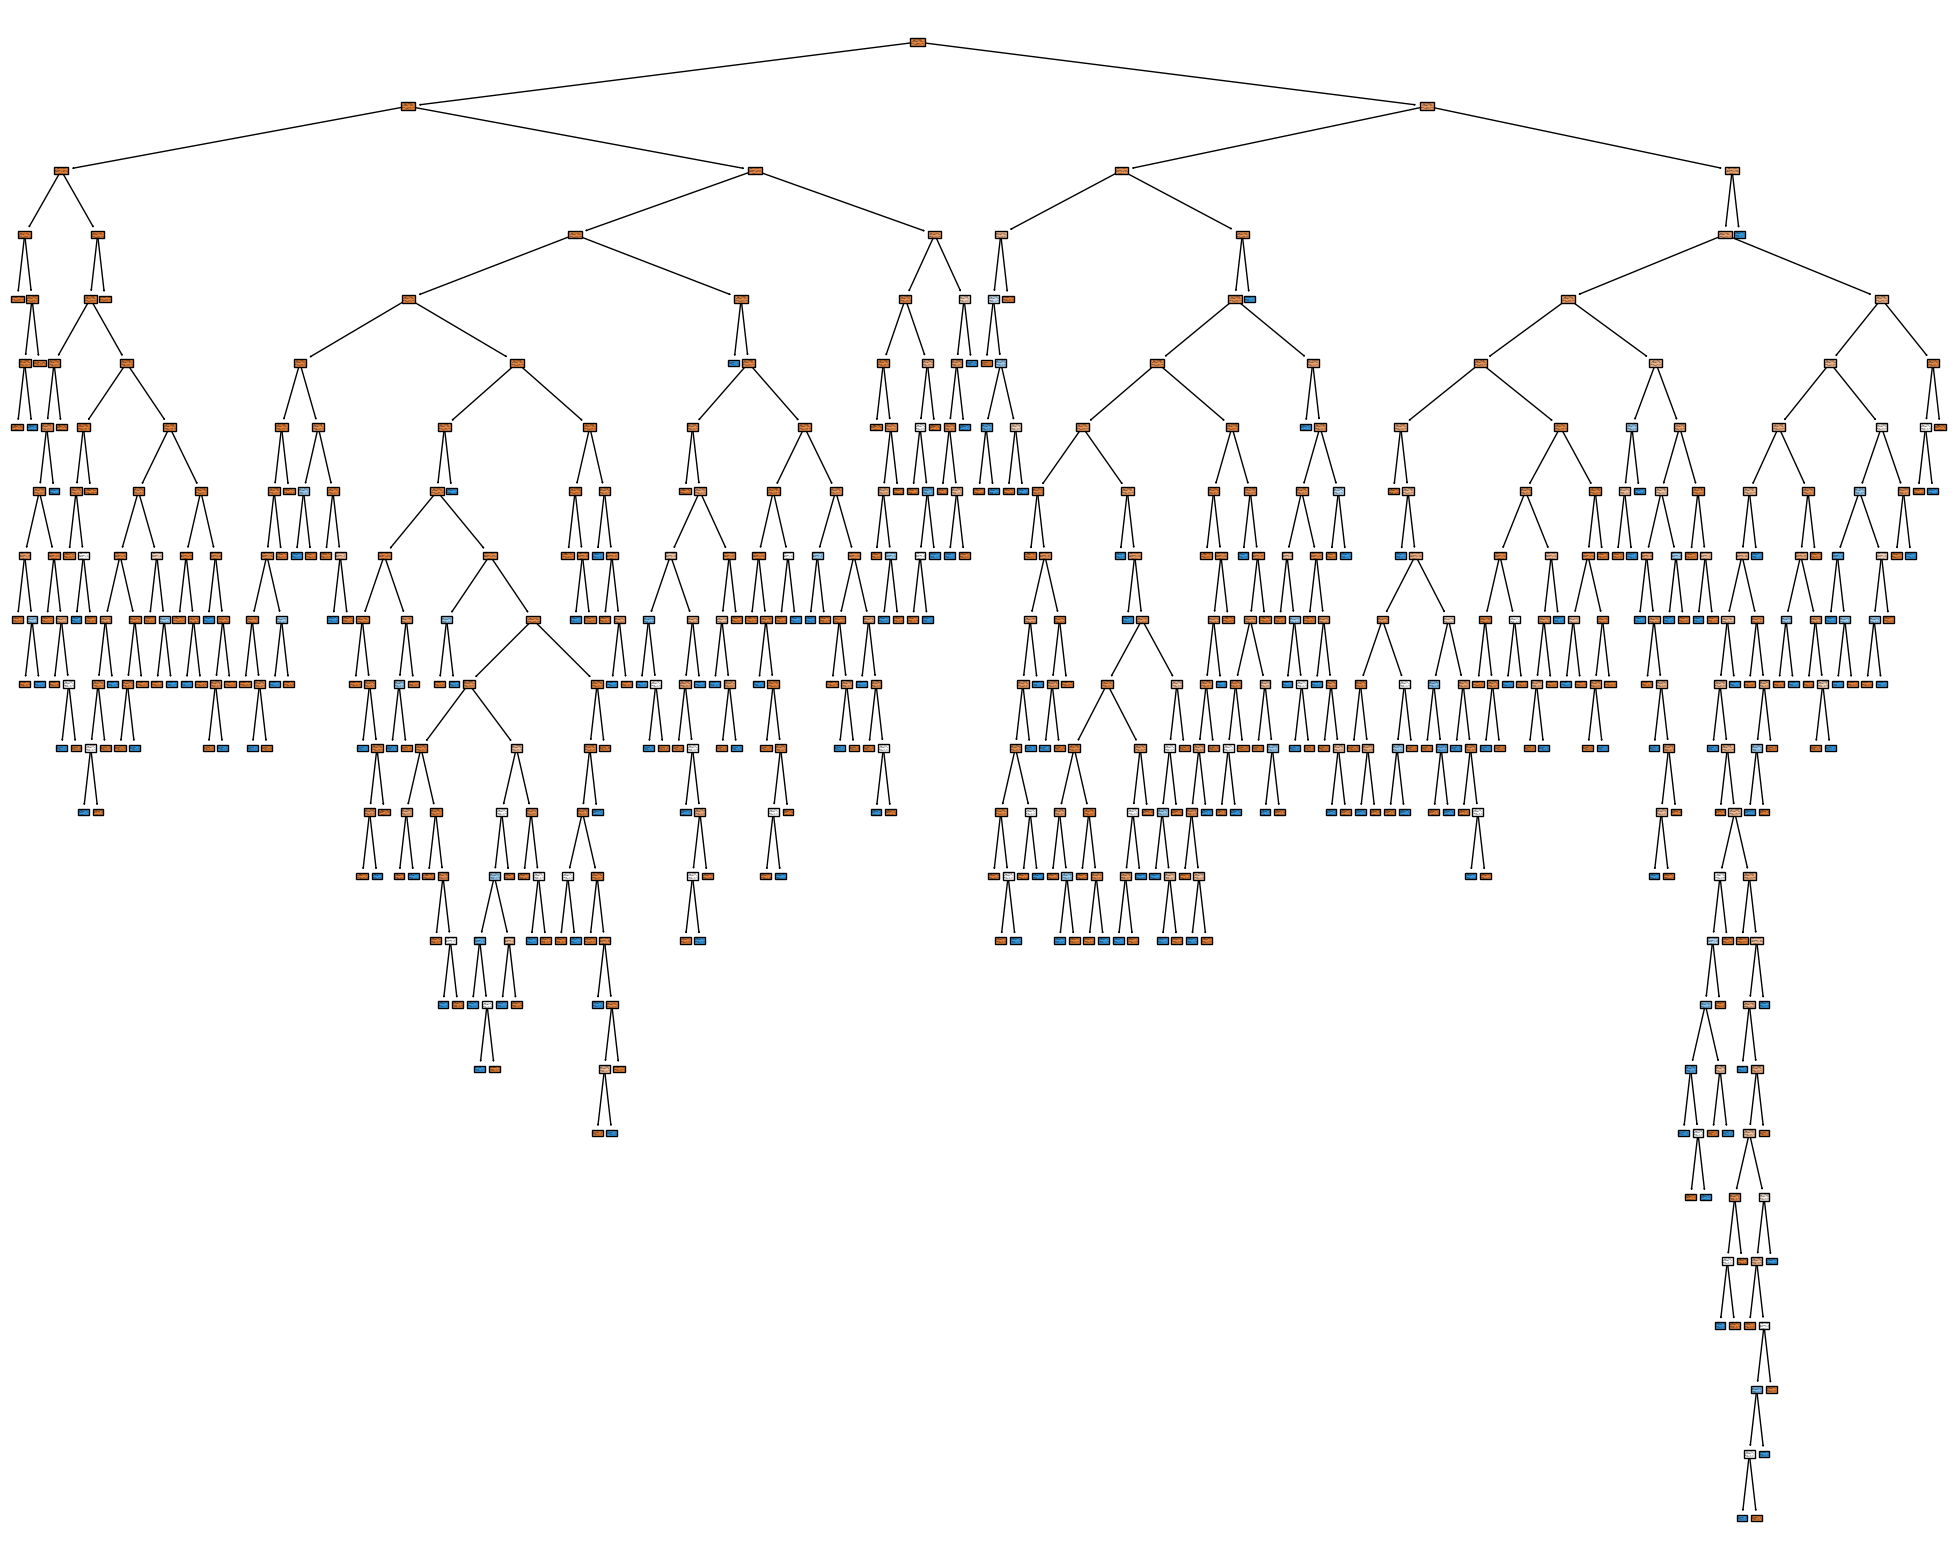

In [160]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model_dtc,
                   feature_names=y,
                   class_names=['0', '1'],
                   filled=True
                   )


### Kesimpulan Dari Algoritma

Akurasi:
* Regresi = 0.9481409001956947 
* Naive Bayes = 0.8786692759295499
* K-Nearest Neighbors = 0.9471624266144814
* Decision Tree = 0.9080234833659491

Dari beberapa algoritma yang digunakan untuk melakukan prediksi dapat disimpulkan bahwa algoritma Regresi dan K-Nearest Neighbors memiliki akurasi yang tertinggi sebesar 95% dengan perbedaan yang sangat kecil. 

Dari kesimpulan tersebut saya akan memutuskan untuk menggunakan algoritma Regresi sebagai model predoksi.

# **EVALUATION**

# Simulasi

In [161]:
input_data = (1, 60, 0, 0, 1, 0, 1, 100, 25, 3)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model_lr.predict(input_data_reshape)

print(prediction)

if (prediction[0] == 0):
    print('Pasien kemungkinan tidak terkena stroke')
else:
    print('Pasien kemungkinan terkena stroke')


[0]
Pasien kemungkinan tidak terkena stroke


c:\Users\ACER-I5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **DEPLOYMENT**

## Save Model

In [162]:
import pickle

filename = 'KlasifikasiStroke.sav'
pickle.dump(model_lr, open(filename, 'wb'))